In [2]:
from graph_tool.all import *

def load_edge_list(edge_list_file):
    g = Graph()

    v_strength = g.new_vertex_property("int")    
    vertex_dict = {}

    file = open(edge_list_file, "r")

    for line in file:
        a, b, w = line.rstrip().split(" ")
        w = int(w)

        if a in vertex_dict:
            v1 = vertex_dict[a]
        else:
            v1 = g.add_vertex()
            vertex_dict[a] = v1

        if b in vertex_dict:
            v2 = vertex_dict[b]
        else:
            v2 = g.add_vertex()
            vertex_dict[b] = v2

        g.add_edge(v1, v2)
        v_strength[v1] = v_strength[v1] + w
        v_strength[v2] = v_strength[v2] + w

    file.close()
    return g

def file_assortativity(edge_list_file):
    g = load_edge_list(edge_list_file)
    return assortativity(g, "total")

In [3]:
import glob

files = glob.glob("../../link_community/infomap_rslt/*.edge-list")

assortativities = [(file, file_assortativity(file)) for file in files]

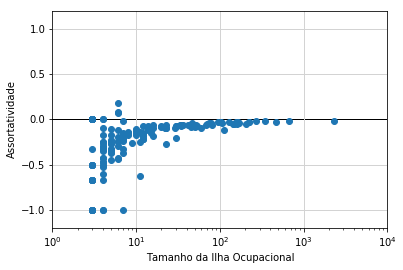

In [4]:
import matplotlib.pyplot as plt
from numpy import arange
import re

matcher = re.compile('(\d+).edge-list$')
def extract(text):
    return int(matcher.search(text).group(1))

x = [extract(r[0]) for r in assortativities]
y = [r[1][0] for r in assortativities]

plt.scatter(x, y, zorder=10)
plt.ylim(-1.2, 1.2)
plt.xlim(1, 10000)
plt.axhline(y=1.0, lw=1, color="lightgray")
plt.axhline(y=0.5, lw=1, color="lightgray")
plt.axhline(y=0.0, lw=1, color="black")
plt.axhline(y=-0.5, lw=1, color="lightgray")
plt.axhline(y=-1.0, lw=1, color="lightgray")

for x_line in range(1, 4):
    plt.axvline(x=10**x_line, lw=1, color="lightgray")
plt.xscale("log")
plt.xlabel("Tamanho da Ilha Ocupacional")
plt.ylabel("Assortatividade")
plt.show()

In [40]:
sorted(assortativities, key=lambda row: row[1])

[('../../link_community/infomap_rslt/group-108-0003.edge-list',
  (-1.0, 0.40000000000000013)),
 ('../../link_community/infomap_rslt/group-143-0003.edge-list',
  (-1.0, 0.40000000000000013)),
 ('../../link_community/infomap_rslt/group-172-0003.edge-list',
  (-1.0, 1.4142135623730951)),
 ('../../link_community/infomap_rslt/group-099-0003.edge-list',
  (-0.6666666666666667, 0.3513641844631534)),
 ('../../link_community/infomap_rslt/group-174-0004.edge-list',
  (-0.6666666666666667, 0.3513641844631534)),
 ('../../link_community/infomap_rslt/group-106-0004.edge-list',
  (-0.6, 0.39846644802803866)),
 ('../../link_community/infomap_rslt/group-070-0005.edge-list',
  (-0.4468085106382979, 0.08675398100425878)),
 ('../../link_community/infomap_rslt/group-081-0006.edge-list',
  (-0.44000000000000006, 0.24125136607870493)),
 ('../../link_community/infomap_rslt/group-067-0004.edge-list',
  (-0.4285714285714286, 0.39565427385757984)),
 ('../../link_community/infomap_rslt/group-094-0005.edge-list',

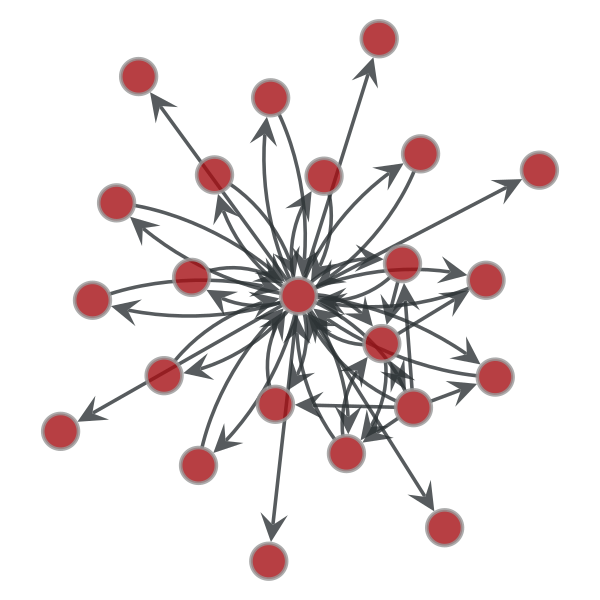

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f32a0412128, at 0x7f32a05288d0>

In [16]:
g = load_edge_list("../../link_community/infomap_rslt/group-042-0023.edge-list")
graph_draw(g)